# Fofonoff flow
**19 May 2023 by MiniUFO**

---

[TOC]

---

## 1. Introduction
Early models of wind-driven oceanic circulation have been developed from linearized equations, with forcing and dissipation.  The neglect of nonlinear advection terms in these equations has greatly simplied the mathmatical manipulations.  These models represent that the ocean circulation asymptotes to a steady state when forcing and disspation are approximately cancelled.

Alternatively, in a seminal paper, [Fofonoff (1954)](https://images.peabody.yale.edu/publications/jmr/jmr13-03-03.pdf) retained the nonlinear terms but neglected the forcing and dissipation.  With an initial input of energy, the flow will also asymptote to a steady state, in which the contours of potential vorticity (PV) $q$ coinside with those of streamfunction $\psi$.  This indicates the advection of PV is exactly zero, hence a steady state of the circulation.

## 2. Theory
### 2.1 Fofonoff's derivation
[Fofonoff (1954)](https://images.peabody.yale.edu/publications/jmr/jmr13-03-03.pdf) started from the 2D non-divergent barotropic model.  This is the simplest 2D nonlinear model:

$$
\begin{align}
\frac{\partial u}{\partial t}+\mathbf{u}\cdot\nabla u&=-\frac{\partial }{\partial x}\left(\frac{p}{\rho_0}\right)+fv \tag{1}\\
\frac{\partial v}{\partial t}+\mathbf{u}\cdot\nabla v&=-\frac{\partial }{\partial y}\left(\frac{p}{\rho_0}\right)-fu \tag{2}\\
\nabla \cdot \mathbf u&=0 \tag{3}\\
\end{align}
$$

Following [Fofonoff (1954)](https://images.peabody.yale.edu/publications/jmr/jmr13-03-03.pdf), one remove the tendency terms to obtain the steady state equation in vector form from Eqs. (1-2):

$$
\begin{align}
\left(\mathbf{u}\cdot\nabla\right) \mathbf u&=-\nabla\left(\frac{p}{\rho_0}\right)-f\mathbf{\hat u} \tag{4}\\
\end{align}
$$

Here $\mathbf{\hat u}=(-v, u)$ is the 90° anti-clockwise rotation of $\mathbf u$.  This is equivalent to:

$$
\begin{align}
\zeta_a\mathbf{\hat u}&=-\nabla\left(\frac{p}{\rho_0}+\frac{1}{2}\mathbf u^2\right) \tag{5}\\
\end{align}
$$

Introducing streamfunction $\psi$ and Bernouli function $Q$, Eq. (5) is:

$$
\begin{align}
\zeta_a\nabla\psi &= \nabla Q \tag{6}\\
\end{align}
$$

implying $Q=Q(\psi)$ and $\zeta_a=-dQ/d\psi$.

### 2.2 A simpler derivation
A more elegant way to derive the balance relation starts from the barotrpic vorticity equation, which is equivalent to equations (1-3):

$$
\begin{align}
\frac{\partial \zeta_a}{\partial t} + \mathbf u\cdot\nabla \zeta_a&= \frac{\partial \zeta_a}{\partial t} + J\left(\psi, \zeta_a\right) = 0 \tag{7}\\
\end{align}
$$

where $J(A,B)=\partial_x A\partial_y B-\partial_y A\partial_x B$ is the Jacobian operator.  Assuming steady state immediately gives $J\left(\psi, \zeta_a\right)=0$.  This implies a functional relation between the streamfunction and absolute vorticity as $\psi = \psi(\zeta_a)$, so that:

$$
\begin{align}
J(\psi, \zeta_a) &= \hat\nabla\psi\cdot\nabla\zeta_a=\frac{d\psi}{d\zeta_a}\hat\nabla\zeta_a\cdot\nabla\zeta_a=0\tag{8}\\
\end{align}
$$

where $\hat\nabla=(-\partial_y, \partial_x)$.  The last equality holds because the curl of a scalar is perpendicular to its divergence.

### 2.3 Stead-state flow
The above derivations show that, if a flow satisfies the steady state, the absolute vorticity should be a constant along a streamline.  [Fofonoff (1954)](https://images.peabody.yale.edu/publications/jmr/jmr13-03-03.pdf) used a simple linear relation between streamfunction and absolute vorticity as $\zeta_a = c_0\psi+c_1$, which yield a 2D elliptic equation as:

$$
\begin{align}
\nabla^2\psi - c_0\psi = c_1-f \tag{9}\\
\end{align}
$$

It is important to note that:
- if $c_0>0$, Eq. (9) is a [screened Poisson equation](https://en.wikipedia.org/wiki/Screened_Poisson_equation), which can be easily solved using `xinvert`;
- if $c_0<0$, Eq. (9) is a [inhomogeneous Helmholtz equation](https://en.wikipedia.org/wiki/Helmholtz_equation#Inhomogeneous_Helmholtz_equation), which is NOT readily solvable using iterative method;


## 3. Examples
Here we will demonstrate how to use `xinvert` python package to invert Eq. (14), and nonlinear loops for inverting Eq. (8).  First we define a rectangular domain and its coordinates.

### 3.1 Classical Fofonoff flow

In [1]:
# construct domain, coordinates, and forcing
import xarray as xr
import numpy as np

xc = np.linspace(0, 600000, 301)
yc = np.linspace(0, 500000, 251)

xdef = xr.DataArray(xc, dims='x', coords={'x':xc})
ydef = xr.DataArray(yc, dims='y', coords={'y':yc})

F = ydef - xdef # broadcast to 2D forcing

In [2]:
# invert for streamfunction
import sys
sys.path.append('../../../../')
from xinvert.xinvert import invert_Fofonoff

iParams = {
    'BCs'      : ['fixed', 'fixed'],
    'mxLoop'   : 4000,
    'tolerance': 1e-14,
    'optArg'   : 1.2,
}

mParams = {
    'f0': 1e-4,
    'beta': 2e-11,
    'c0': 8e-9,
    'c1': 1e-4,
}

sf = invert_Fofonoff(F, dims=['y', 'x'], coords='cartesian', iParams=iParams, mParams=mParams)

{} loops 1174 and tolerance is 9.362824e-15


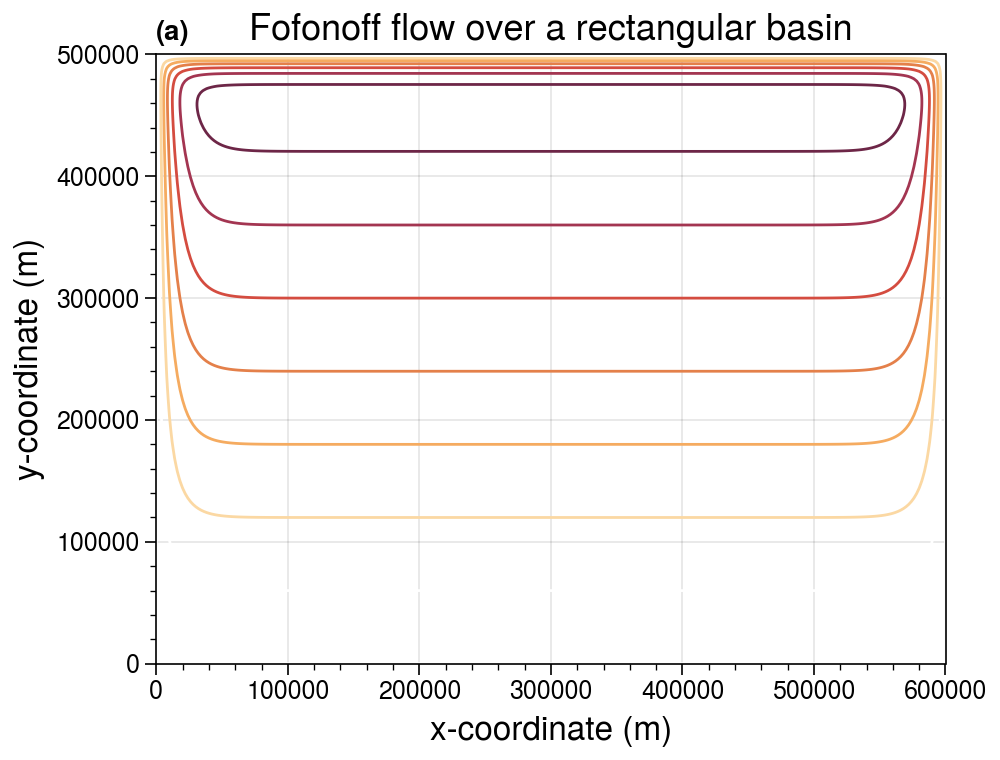

In [11]:
# plot the flow pattern
import proplot as pplt

fig, axes = pplt.subplots(figsize=(5,3.8), sharex=3, sharey=3)

fontsize = 13

ygrid, xgrid = xr.broadcast(ydef, xdef)

ax = axes[0]
ax.contour(sf, levels=11, lw=1)
ax.set_ylabel('y-coordinate (m)', fontsize=fontsize-1)
ax.set_xlabel('x-coordinate (m)', fontsize=fontsize-1)
ax.set_title('Fofonoff flow over a rectangular basin', fontsize=fontsize)

axes.format(abc='(a)')

### 3.2 global Fofonoff flow

In [12]:
# load in wind stress from SODA product
ds = xr.open_dataset('../../../Data/SODA_curl.nc')
curl = ds.curl

iParams = {
    'BCs'      : ['fixed', 'periodic'],
    'mxLoop'   : 5000,
    'tolerance': 1e-18,
    'optArg'   : 0.3,
}

mParams = {
    'c0': 3e-11,
    'c1': 0,
}

sf = invert_Fofonoff(curl[0], dims=['lat', 'lon'], coords='lat-lon', iParams=iParams, mParams=mParams)

{} loops 5000 and tolerance is 3.335685e-09


C:\ProgramData\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


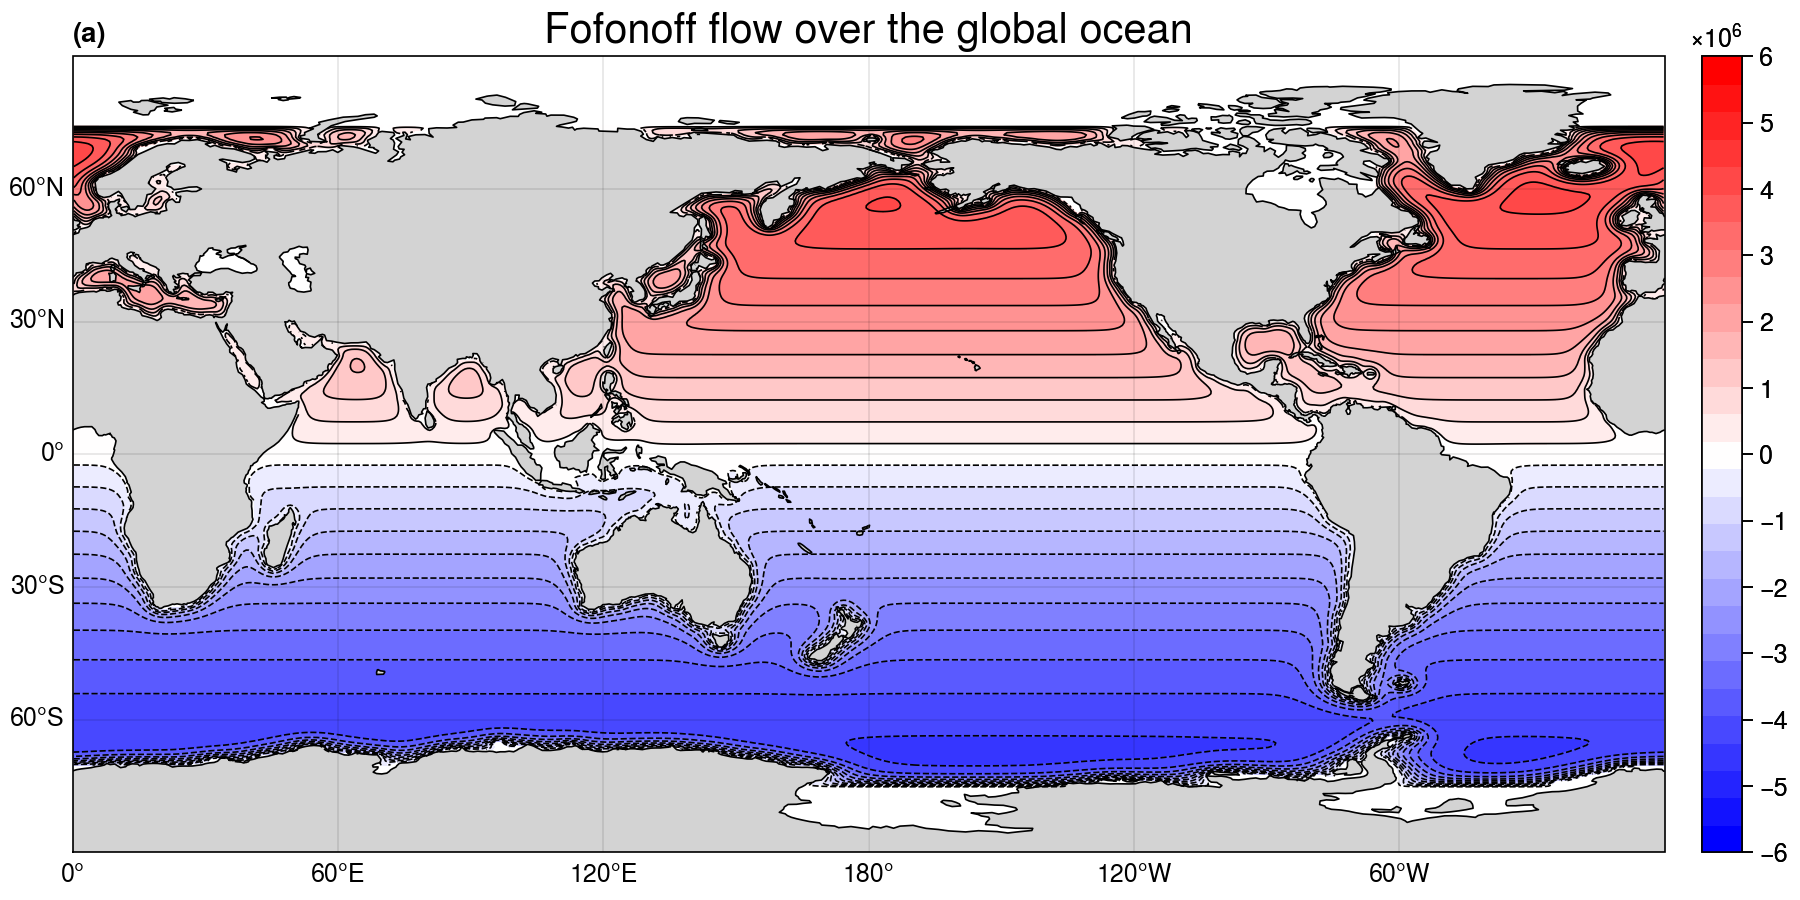

In [13]:
# plot the flow pattern
import proplot as pplt

fontsize = 15

fig, axes = pplt.subplots(figsize=(9,4.5), sharex=3, sharey=3, proj='cyl', proj_kw={'central_longitude':180})

ax = axes[0]
m = ax.contourf(sf, levels=np.linspace(-6e6, 6e6, 30), cmap='bwr')
ax.contour(sf, levels=np.linspace(-6e6, 6e6, 30), lw=0.6, color='k')
ax.colorbar(m, loc='r', ticks=1e6, label='', length=1)
ax.set_title('Fofonoff flow over the global ocean', fontsize=fontsize)

axes.format(abc='(a)', land=True, coast=True, lonlabels='b', latlabels='l', lonlines=60, latlines=30, landcolor='lightgray')

---

### References
1. Fofonoff, N. P., 1954: [Steady flow in a frictionless homogeneous ocean](https://images.peabody.yale.edu/publications/jmr/jmr13-03-03.pdf). *J. Marine Res.*, **14**, 254-262.